In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-regional-sales-data/US_Regional_Sales_Data.csv


In [66]:
df=pd.read_csv('/kaggle/input/us-regional-sales-data/US_Regional_Sales_Data.csv')

In [67]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [68]:
df.shape

(7991, 16)

In [69]:
df.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [70]:
df.dtypes

OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Cost            object
Unit Price           object
dtype: object

In [71]:
df[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']]=df[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']].astype('datetime64[ns]')

/tmp/ipykernel_32/1032024876.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']]=df[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']].astype('datetime64[ns]')


In [72]:
df['demand_time']=df['OrderDate']-df['ProcuredDate']
df['demand_time']
df['delay_time']=df['DeliveryDate']-df['OrderDate']
df['delay_time']


0        19 days
1      -113 days
2      -144 days
3        36 days
4        26 days
          ...   
7986     15 days
7987     92 days
7988     27 days
7989     26 days
7990     20 days
Name: delay_time, Length: 7991, dtype: timedelta64[ns]

In [73]:
df['delay_time']=df['delay_time'].astype('str').str.replace(' days','')
df['delay_time']=df['delay_time'].astype(int)

In [74]:
df['demand_time']=df['demand_time'].astype('str').str.replace(' days','')
df['demand_time']=df['demand_time'].astype(int)

In [75]:
df['Unit Price']=df['Unit Price'].str.replace(',','').astype(float)

In [76]:
df['Unit Cost']=df['Unit Cost'].str.replace(',','').astype(float)

In [77]:
df.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Cost                  float64
Unit Price                 float64
demand_time                  int64
delay_time                   int64
dtype: object

<Axes: title={'center': 'Bar chart of Sales Channel'}, xlabel='Sales Channel'>

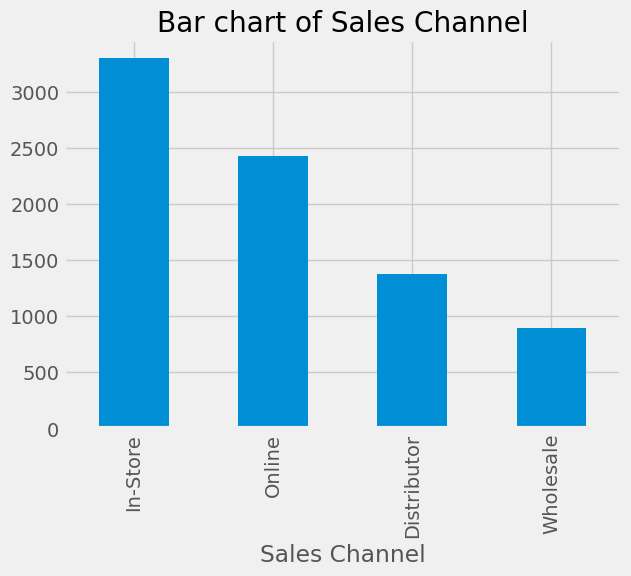

In [78]:
df['Sales Channel'].value_counts()\
.plot(kind='bar',title='Bar chart of Sales Channel')


<Axes: ylabel='WarehouseCode'>

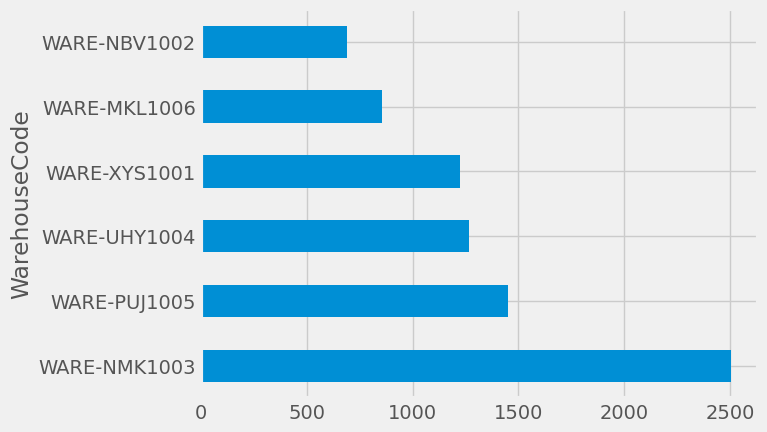

In [79]:
df.WarehouseCode.value_counts().plot(kind='barh')

<Axes: ylabel='_CustomerID'>

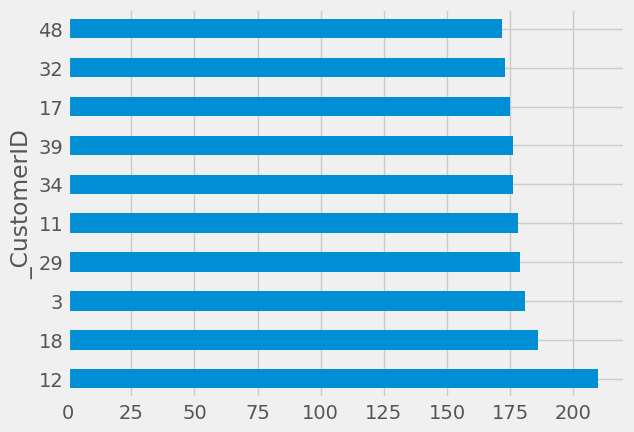

In [80]:
df['_CustomerID'].value_counts().head(10)\
.plot(kind='barh')

<Axes: ylabel='_StoreID'>

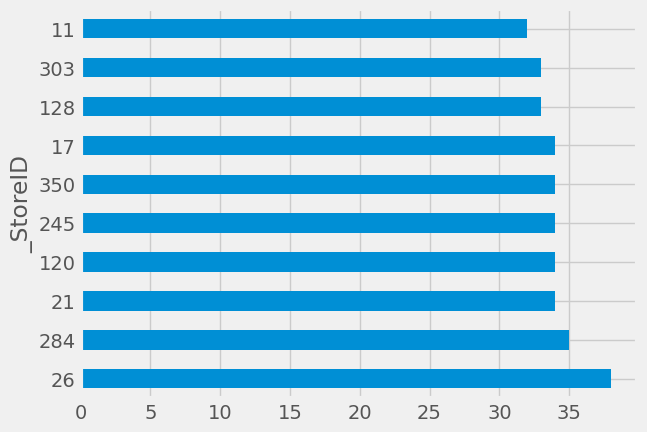

In [81]:
df['_StoreID'].value_counts()\
.head(10)\
.plot(kind='barh')

<Axes: ylabel='_SalesTeamID'>

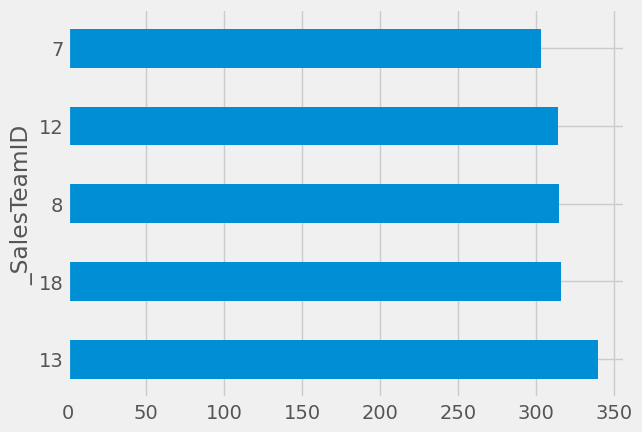

In [82]:
df['_SalesTeamID'].value_counts()\
.head(5)\
.plot(kind='barh')

Text(0.5, 0, 'Order qty')

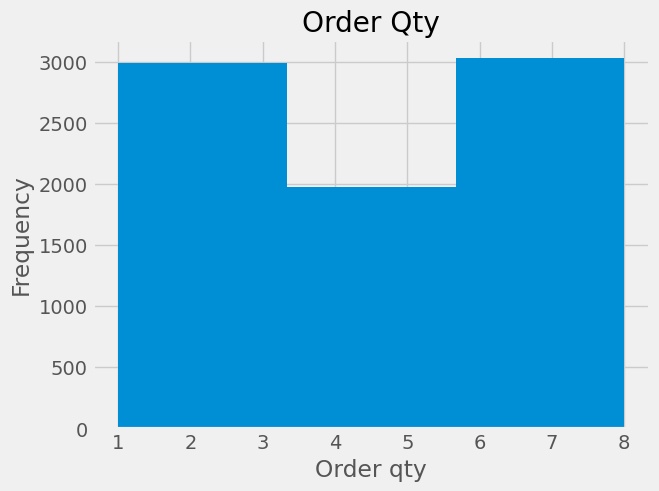

In [83]:
ax = df['Order Quantity'].plot(kind='hist',
                          bins=3,
                          title='Order Qty')
ax.set_xlabel('Order qty')

Text(0.5, 0, 'Unit Cost')

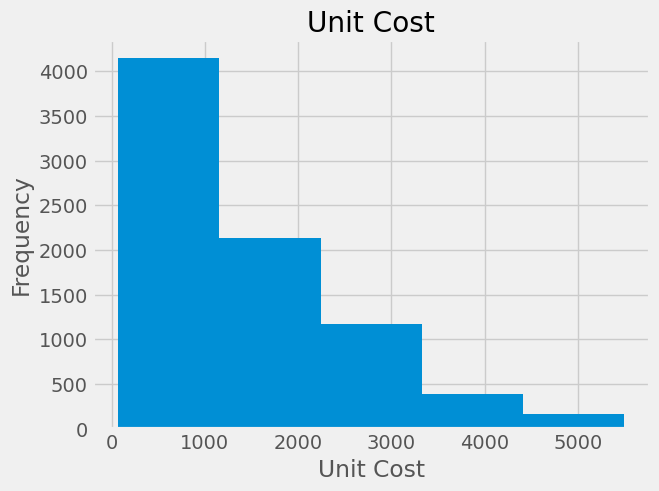

In [84]:
ax = df['Unit Cost'].plot(kind='hist',
                          bins=5,
                          title='Unit Cost')
ax.set_xlabel('Unit Cost')

Text(0.5, 0, 'Unit Price')

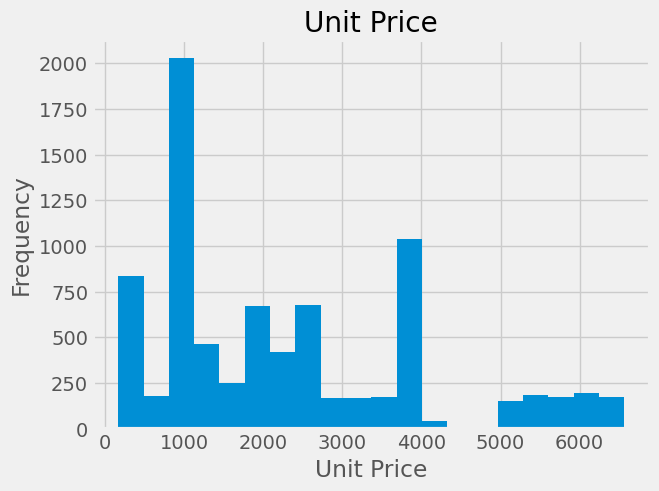

In [85]:
ax = df['Unit Price'].plot(kind='hist',
                          bins=20,
                          title='Unit Price')
ax.set_xlabel('Unit Price')

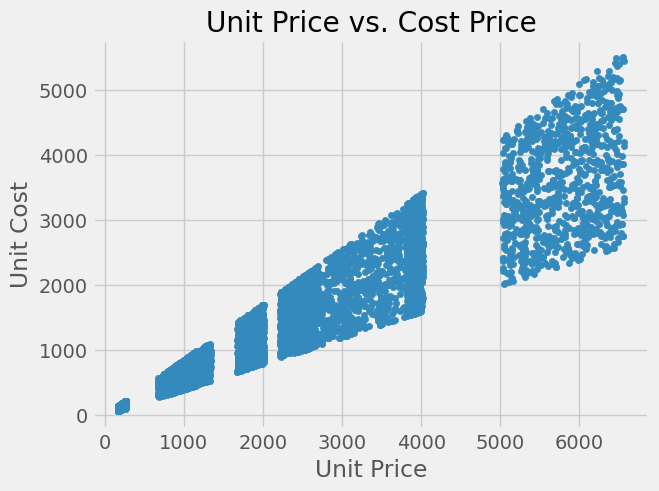

In [86]:
#Relationship between Unit price and Unit cost
df.plot(kind='scatter',
        x='Unit Price',
        y='Unit Cost',
        title='Unit Price vs. Cost Price')
plt.show()


In [87]:
cor=df[['Order Quantity','Discount Applied','Unit Price','Unit Cost']].corr()

<Axes: >

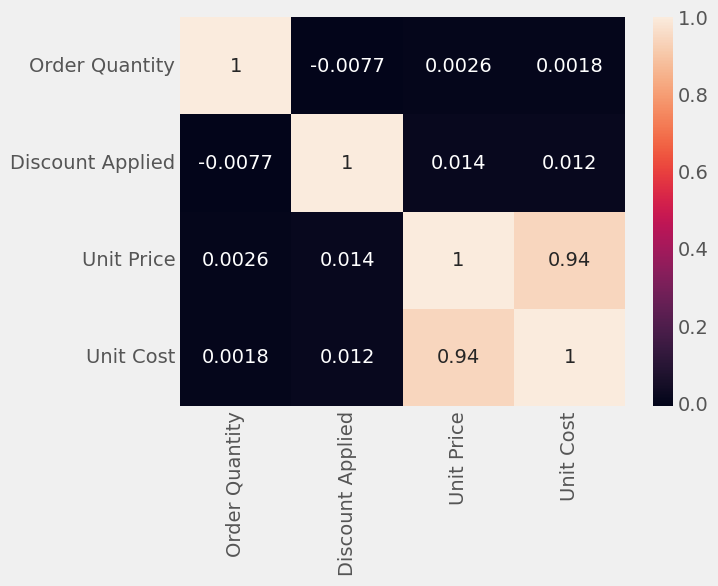

In [88]:
sns.heatmap(cor,annot=True)

<Axes: ylabel='Density'>

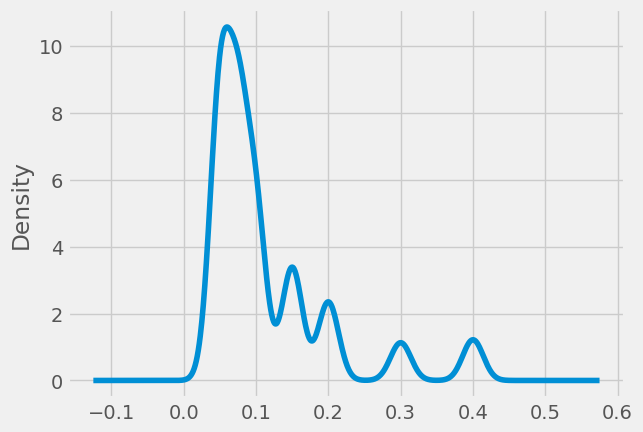

In [89]:
df['Discount Applied'].plot(kind='kde')

In [90]:
df.describe()

,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,demand_time,delay_time
count,7991,7991,7991,7991,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,2019-06-10 00:36:02.432736768,2019-09-10 10:06:33.742960896,2019-09-26 08:00:25.228381952,2019-09-30 16:42:06.442247424,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,1431.911513,2284.536504,92.396196,20.274684
min,2017-12-31 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-07 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,68.680000,167.500000,-288.000000,-334.000000
25%,2018-10-27 00:00:00,2019-01-18 12:00:00,2019-02-03 00:00:00,2019-02-07 00:00:00,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,606.120000,1031.800000,-35.000000,-25.500000
50%,2019-04-02 00:00:00,2019-09-19 00:00:00,2019-09-29 00:00:00,2019-10-05 00:00:00,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1080.580000,1849.200000,85.000000,24.000000
75%,2020-06-18 00:00:00,2020-05-14 00:00:00,2020-05-27 00:00:00,2020-06-03 00:00:00,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,2040.250000,3611.300000,147.000000,61.000000
max,2020-10-03 00:00:00,2020-12-30 00:00:00,2021-12-01 00:00:00,2021-12-01 00:00:00,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,5498.560000,6566.000000,693.000000,567.000000
std,NaN,NaN,NaN,NaN,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1112.413063,1673.096364,176.690092,121.767294


In [91]:
df.duplicated().sum()

0

In [92]:
df['ProcuredYear']=df['ProcuredDate'].dt.year
df['ProcuredYear']


0       2017
1       2017
2       2017
3       2017
4       2018
        ... 
7986    2020
7987    2020
7988    2020
7989    2020
7990    2020
Name: ProcuredYear, Length: 7991, dtype: int32

<Axes: ylabel='ProcuredYear'>

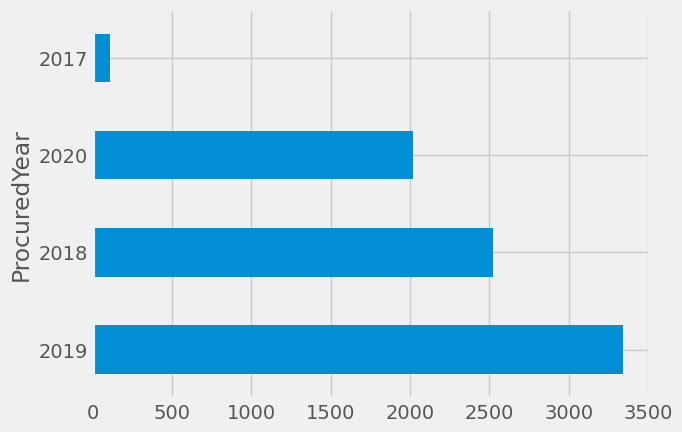

In [93]:
#Procurement based on Year
df.ProcuredYear.value_counts()\
.head(10)\
.plot(kind='barh')

In [94]:
df.ProcuredMonth=df['ProcuredDate'].dt.month

/tmp/ipykernel_32/314196790.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ProcuredMonth=df['ProcuredDate'].dt.month


<Axes: xlabel='ProcuredDate'>

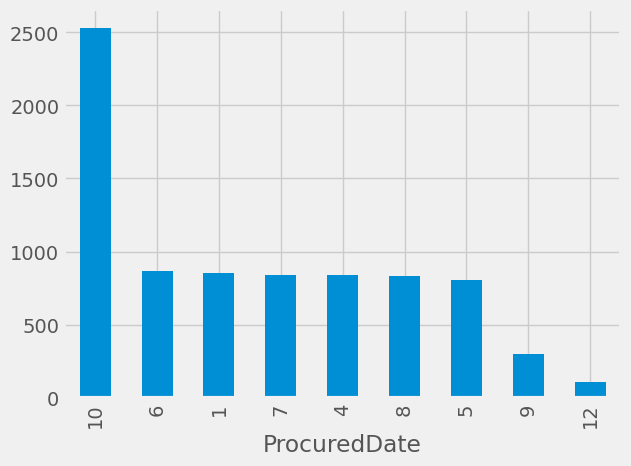

In [95]:
#Procurement base on month
df.ProcuredMonth.value_counts()\
.plot(kind='bar')

<Axes: xlabel='OrderMonth'>

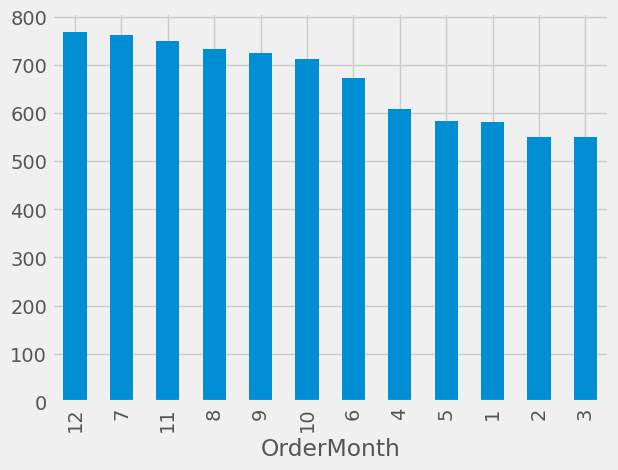

In [96]:
#order with respect to month
df['OrderMonth']=df['OrderDate'].dt.month
df['OrderMonth'].value_counts()\
.plot(kind='bar')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


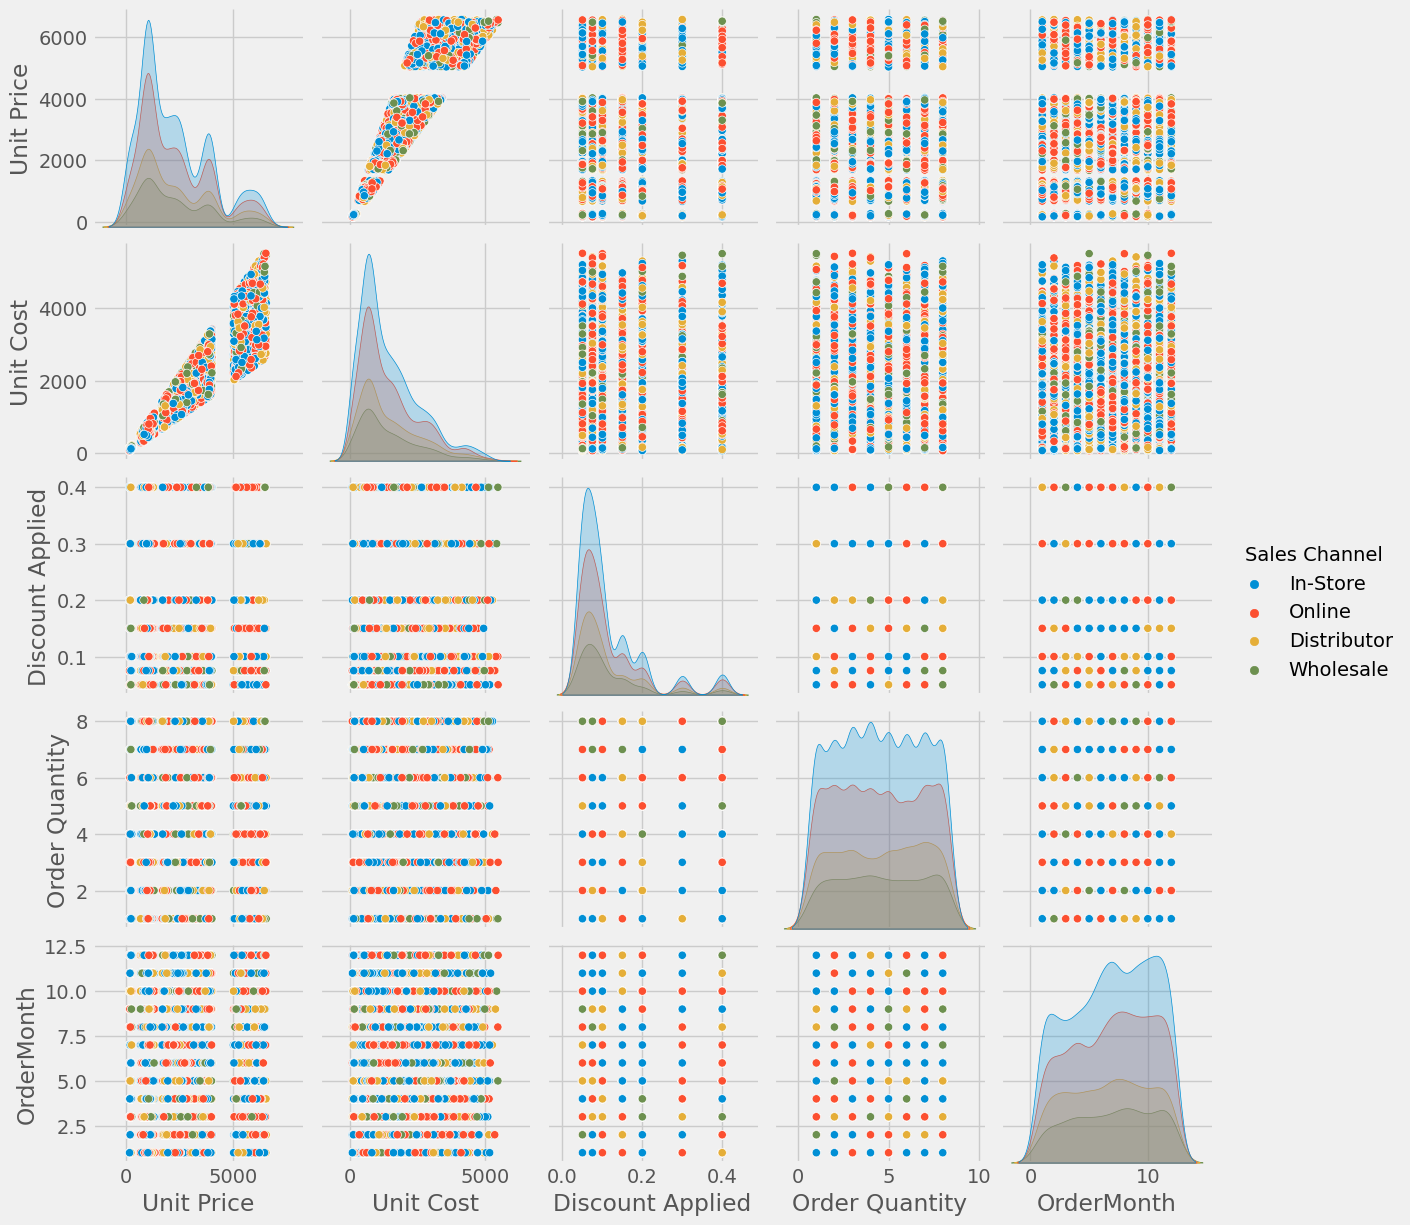

In [97]:
#relationship beween variables
sns.pairplot(df,
             vars=['Unit Price','Unit Cost',
                   'Discount Applied','Order Quantity','OrderMonth'],
            hue='Sales Channel')
plt.show()


In [98]:
df['Profit']=(df['Order Quantity']*(((df['Unit Price'])-(df['Unit Price']*df['Discount Applied']))- df['Unit Cost']))

<Axes: ylabel='Density'>

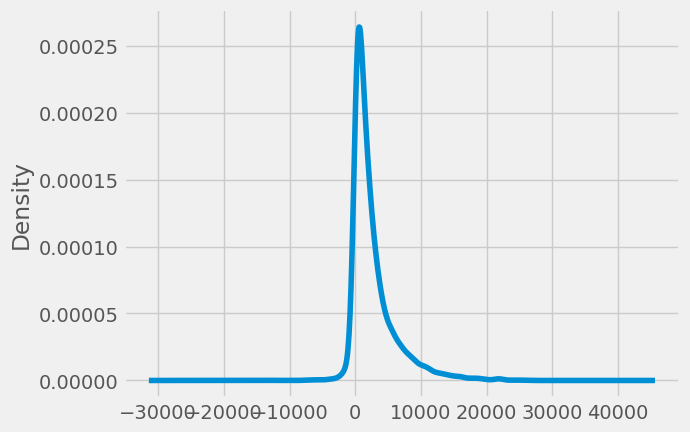

In [99]:
df['Profit'].plot(kind="kde")

In [100]:
def profits(x):
    if x<0:
        return "No"
    else:
        return "Yes"

In [101]:
df['Profitable']= df['Profit'].apply(profits)

In [102]:
df['Profitable'].value_counts()

Profitable
Yes    7619
No      372
Name: count, dtype: int64

In [103]:
df_grouped = df.groupby('Sales Channel').agg({'Profit':['sum','mean']})
print(df_grouped)

                     Profit             
                        sum         mean
Sales Channel                           
Distributor    3.887897e+06  2827.561736
In-Store       8.797853e+06  2667.632879
Online         6.166816e+06  2543.016785
Wholesale      2.472745e+06  2769.030840


In [104]:
df_grouped1 = df.groupby('WarehouseCode').agg({'Profit':['sum','mean']})
print(df_grouped1)

                     Profit             
                        sum         mean
WarehouseCode                           
WARE-MKL1006   2.347054e+06  2738.686047
WARE-NBV1002   1.788359e+06  2588.073477
WARE-NMK1003   6.782679e+06  2707.656147
WARE-PUJ1005   3.836436e+06  2643.994445
WARE-UHY1004   3.436950e+06  2716.956453
WARE-XYS1001   3.133834e+06  2564.511989


In [105]:
cor1=df[['Order Quantity','Discount Applied','Unit Price','Unit Cost','Profit']].corr()

<Axes: >

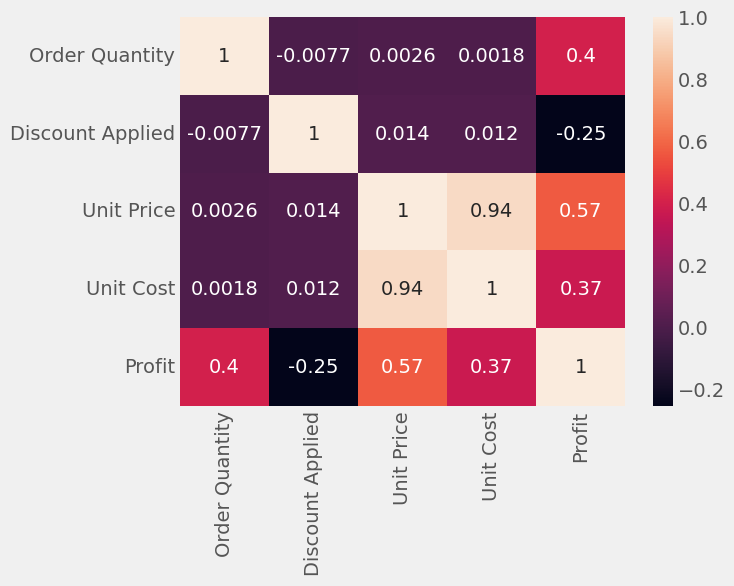

In [106]:
sns.heatmap(cor1,annot=True)

# **Data-modeling**

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
X = df[['Order Quantity', 'Unit Price', 'Unit Cost']]
y = df['Profit']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_decision_tree

array([5804.88 , -121.94 , 2135.83 , ..., 2922.8  , 2147.88 ,  277.845])

In [139]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [140]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [141]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_linear_regression=linear_regression.predict(X_test)


In [142]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")

In [143]:
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")
evaluate_model(y_test, y_pred_linear_regression, "linear_regression")

Model: Decision Tree
Mean Squared Error: 3358587.6142014842
R-squared (R2) Score: 0.6966043311431597
Model: Random Forest
Mean Squared Error: 1928042.7935446876
R-squared (R2) Score: 0.8258315994322579
Model: Gradient Boosting
Mean Squared Error: 1748227.1735567409
R-squared (R2) Score: 0.8420751180072887
Model: linear_regression
Mean Squared Error: 3176217.1374075217
R-squared (R2) Score: 0.7130786409252494


In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
from sklearn.feature_selection import SelectKBest, f_regression

In [119]:
selector = SelectKBest(f_regression, k=3)

In [120]:
X_selected = selector.fit_transform(X_scaled, y)

In [121]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create your GradientBoostingRegressor
regressor = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    # Add more hyperparameters as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5)  # You can specify the number of cross-validation folds

# Fit the grid search to your data
grid_search.fit(X_train1, y_train1)  # X and y are your training data

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_

In [126]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [127]:
best_regressor

GradientBoostingRegressor(max_depth=5)

In [133]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=5,learning_rate=0.1)
gradient_boosting.fit(X_train1, y_train1)
y_pred_gradient_boosting = gradient_boosting.predict(X_test1)

In [134]:
# Evaluate the model
mse = mean_squared_error(y_test1, y_pred_gradient_boosting)
r2 = r2_score(y_test1, y_pred_gradient_boosting)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 1757137.252395791
R-squared (R2) Score: 0.8412702322518867
